In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray
%matplotlib inline

# Niño 3.4 index

1.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [2]:
ds= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
Sac= ds.sst.sel(lon=slice(190, 240), lat=slice(-5, 5)).groupby('time.month')
Sac

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [5]:
Nino = Sac - Sac.mean(dim='time')
NinoMean = Nino.mean(dim=['lat', 'lon'])
NinoMean

<xarray.DataArray 'sst' (time: 684)>
array([-3.1957984e-01, -4.6852136e-01, -2.6815218e-01, -1.8696745e-01,
       -1.7759636e-01, -3.5768992e-01, -1.4197068e-01,  1.4657872e-02,
       -1.5222043e-01, -3.7986514e-01, -3.6089247e-01, -2.0869622e-01,
       -1.9147430e-01, -1.3428515e-01, -2.4037480e-01, -1.8512812e-01,
        5.1916372e-02,  2.3938322e-01, -7.0339397e-02, -4.1869378e-01,
       -7.7831775e-01, -7.9238480e-01, -4.9628872e-01, -4.1730934e-01,
       -4.4478282e-01, -4.5594049e-01, -4.3603396e-01, -4.6692902e-01,
       -5.6453085e-01, -4.2688489e-01, -2.7672547e-01, -3.1720972e-01,
       -6.7316109e-01, -6.6611850e-01, -8.1770629e-01, -8.6548859e-01,
       -7.0140064e-01, -3.5703859e-01,  6.9625296e-02,  1.7339660e-01,
       -9.0669163e-02,  7.6916955e-02,  6.8764049e-01,  7.9526329e-01,
        7.1297574e-01,  8.3424962e-01,  9.0853900e-01,  1.0858847e+00,
        8.5155445e-01,  5.2339661e-01, -1.3054201e-01, -6.3436538e-01,
       -8.6198235e-01, -9.4594681e-01, -7.8417778e-01, -1.0943437e+00,
       -1.2545164e+00, -1.1898344e+00, -1.2919568e+00, -1.2047966e+00,
       -7.8299785e-01, -3.6868739e-01, -1.1260075e-01, -7.6634012e-02,
        2.6837486e-01,  5.9115070e-01,  8.1201196e-01,  1.2380702e+00,
        1.2775931e+00,  1.5243515e+00,  1.5832040e+00,  1.4411814e+00,
        1.1759483e+00,  9.1274983e-01,  9.7401869e-01,  5.4807854e-01,
       -1.2716596e-01,  1.6879797e-01,  2.0798153e-01, -1.7554384e-01,
...
       -1.4300026e+00, -1.4566275e+00, -1.3759688e+00, -1.3508205e+00,
       -1.4731961e+00, -1.0574347e+00, -8.5620564e-01, -4.8650801e-01,
       -1.4349043e-01,  4.2982716e-02, -1.1235826e-01, -3.0135235e-01,
       -5.8117193e-01, -7.4650556e-01, -9.9722546e-01, -1.0019503e+00,
       -7.0119357e-01, -5.6635094e-01, -3.0147669e-01, -1.5211226e-01,
       -8.4630601e-02,  7.5953633e-02,  1.7238079e-01,  3.8049364e-01,
        8.3654034e-01,  6.2760067e-01,  4.9786237e-01, -3.8316193e-01,
       -6.9563270e-01, -5.4922789e-01, -3.6749738e-01,  9.5283233e-02,
       -3.9338361e-02, -2.3501316e-01, -2.6667309e-01, -2.9699394e-01,
       -2.1477483e-01, -8.1600435e-02, -1.5828373e-01, -3.9171723e-01,
       -5.3803706e-01, -6.7143130e-01, -3.8115814e-01,  2.2428645e-02,
        3.6434561e-01,  2.0831840e-01,  8.8038445e-02, -1.8357644e-03,
        2.5484514e-01,  5.1869166e-01,  8.6020625e-01,  7.2358847e-01,
        6.2317705e-01,  5.4424441e-01,  5.9339762e-01,  9.0459478e-01,
        1.0037961e+00,  1.1426607e+00,  1.4040657e+00,  1.6555315e+00,
        1.9147604e+00,  2.3238080e+00,  2.7023039e+00,  2.5217140e+00,
        2.4617841e+00,  2.1428695e+00,  1.6179831e+00,  1.1509792e+00,
        4.6409106e-01, -1.1223720e-01, -5.6739616e-01, -6.4774352e-01,
       -6.4002270e-01, -8.9667594e-01, -9.7077346e-01, -8.5526085e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

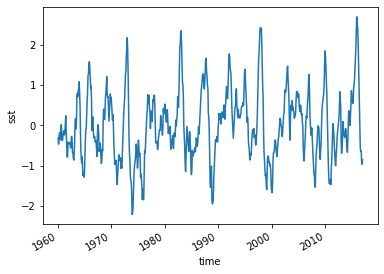

In [6]:
NinoMean.plot()

1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one

Text(0.5, 0, 'year')

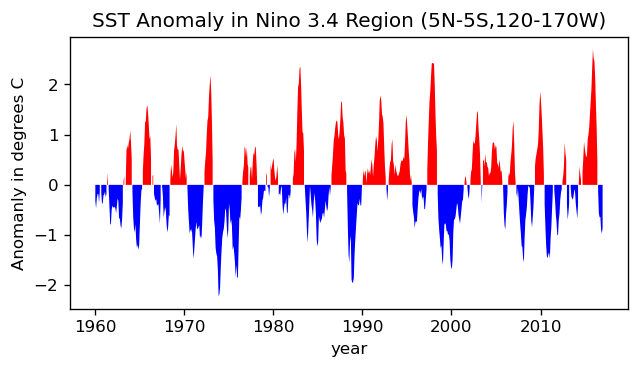

In [7]:
plt.figure(figsize=(6,3), dpi=120)
plt.fill_between(NinoMean.time,NinoMean.data,where=(NinoMean>0),facecolor = 'red')
plt.fill_between(NinoMean.time,NinoMean.data,where=(NinoMean<0),facecolor = 'blue')
plt.title("SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)")
plt.ylabel("Anomanly in degrees C")
plt.xlabel("year")

I got inspired by reading:https://blog.csdn.net/HHG20171226/article/details/101650909

# Earth’s energy budget

2.1 [5 points] Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

In [8]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

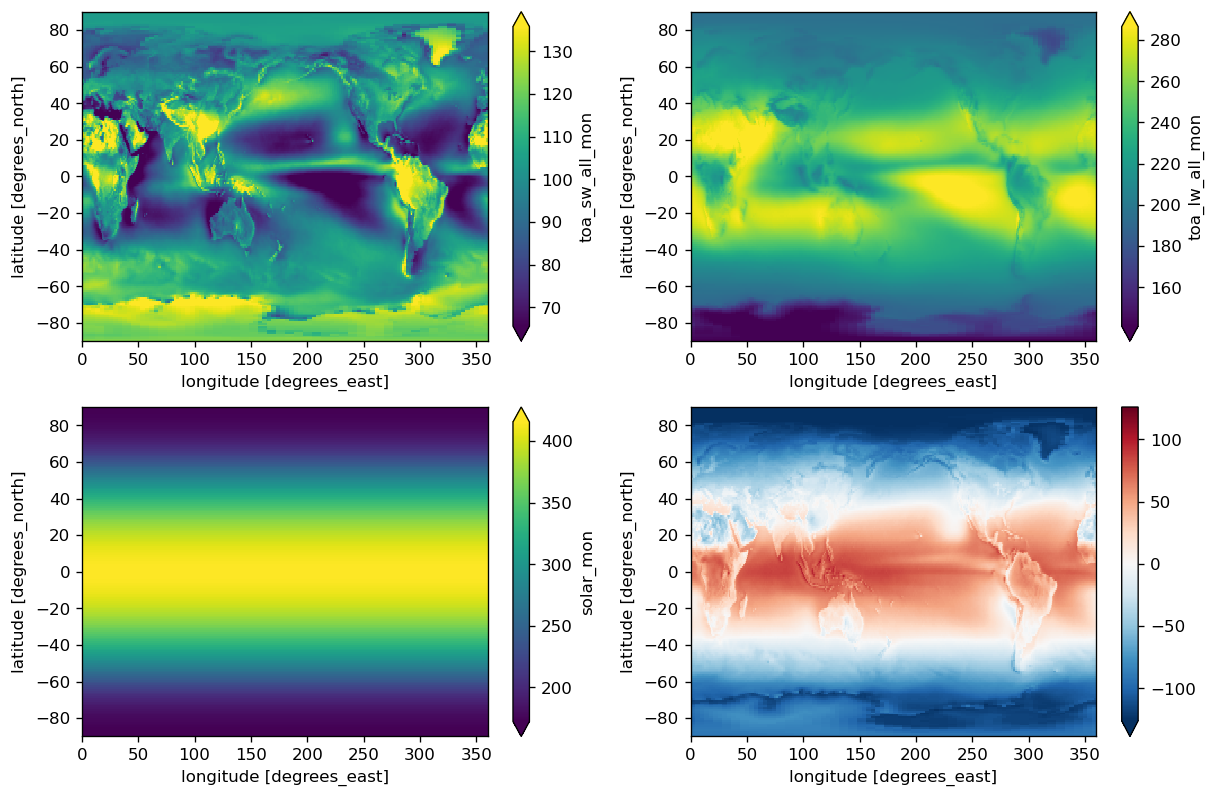

In [9]:
toa_sw_all_mean = ds.toa_sw_all_mon.mean(dim = 'time')
toa_lw_all_mean = ds.toa_lw_all_mon.mean(dim = 'time')
solar_mean = ds.solar_mon.mean(dim = 'time')
toa_net_flux_add = solar_mean-toa_sw_all_mean-toa_lw_all_mean
plt.figure(figsize=(12,8), dpi=120)
plt.subplot(2,2,1)
toa_sw_all_mean.plot(robust=True)
plt.subplot(2,2,2)
toa_lw_all_mean.plot(robust=True)
plt.subplot(2,2,3)
solar_mean.plot(robust=True)
plt.subplot(2,2,4)
toa_net_flux_add.plot(robust=True)

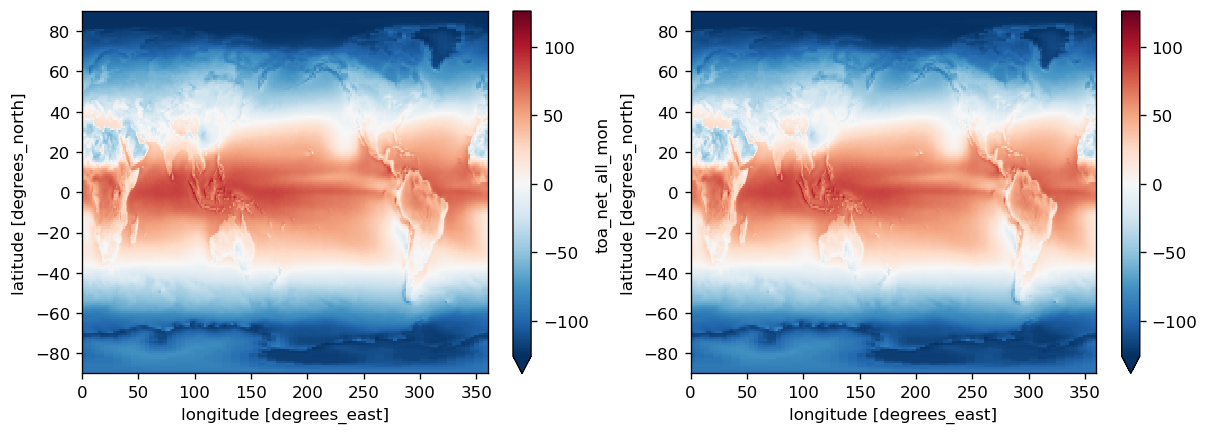

In [10]:
toa_net_flux_mean = ds.toa_net_all_mon.mean(dim = 'time')
plt.figure(figsize=(12,4), dpi=120)
plt.subplot(1,2,1)
toa_net_flux_mean.plot(robust=True)
plt.subplot(1,2,2)
toa_net_flux_add.plot(robust=True)

2.2 [10 points] Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

In [11]:
import import_ipynb
import area

importing Jupyter notebook from area.ipynb


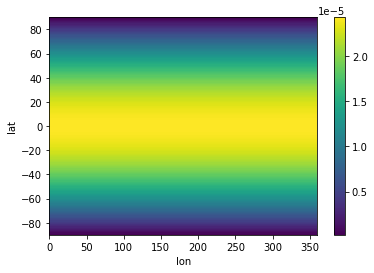

In [12]:
grid_area = area.get_area_from_dataset(toa_net_flux_mean)
grid_area_weight = grid_area/grid_area.sum()
grid_area_weight.plot()

In [13]:
TOA_incoming_solar = ds.solar_mon.sel(time=slice("2000-01-01", "2010-12-31")).mean(dim = 'time')
TOA_incoming_solar_wMean = (TOA_incoming_solar*grid_area_weight).sum()
TOA_incoming_solar_wMean

<xarray.DataArray ()>
array(340.30208353)

In [14]:
outgoing_longwave = ds.toa_lw_all_mon.sel(time=slice("2000-01-01", "2010-12-31")).mean(dim = 'time')
outgoing_longwave_wMean = (outgoing_longwave*grid_area_weight).sum()
outgoing_longwave_wMean

<xarray.DataArray ()>
array(240.29922999)

In [15]:
outgoing_shortwave = ds.toa_sw_all_mon.sel(time=slice("2000-01-01", "2010-12-31")).mean(dim = 'time')
outgoing_shortwave_wMean = (outgoing_shortwave*grid_area_weight).sum()
outgoing_shortwave_wMean

<xarray.DataArray ()>
array(99.24315248)

2.3 [5 points] Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

Text(0, 0.5, 'total amount of net radiation (W m-2)')

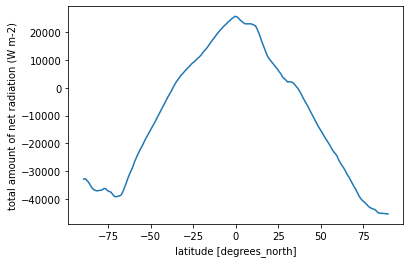

In [16]:
total_amount_of_net_radiation =ds.toa_net_all_mon.mean(dim='time').sum(dim = 'lon').plot()
plt.ylabel('total amount of net radiation (W m-2)')

2.4 [5 points] Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.

Text(0.5, 1.0, 'out_lw_mean_high_loud')

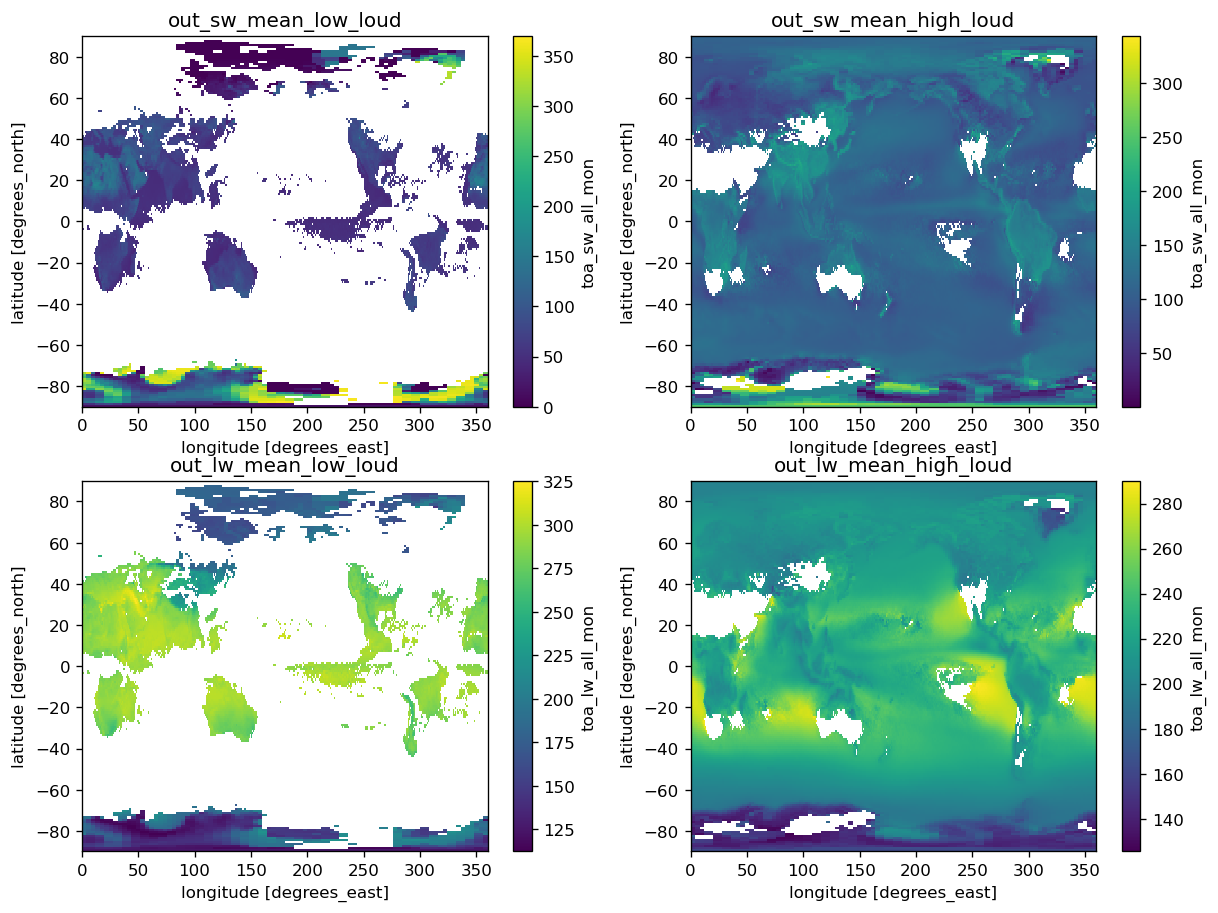

In [17]:
out_sw_mean_low_loud = ds.where(ds.cldarea_total_daynight_mon<=25).toa_sw_all_mon.mean(dim = 'time')
out_sw_mean_high_loud = ds.where(ds.cldarea_total_daynight_mon>=75).toa_sw_all_mon.mean(dim = 'time')
out_lw_mean_low_loud = ds.where(ds.cldarea_total_daynight_mon<=25).toa_lw_all_mon.mean(dim = 'time')
out_lw_mean_high_loud = ds.where(ds.cldarea_total_daynight_mon>=75).toa_lw_all_mon.mean(dim = 'time')
plt.figure(figsize=(12,9), dpi=120)
plt.subplot(2, 2, 1)
out_sw_mean_low_loud.plot()
plt.title('out_sw_mean_low_loud')
plt.subplot(2, 2, 2)
out_sw_mean_high_loud.plot()
plt.title('out_sw_mean_high_loud')
plt.subplot(2, 2, 3)
out_lw_mean_low_loud.plot()
plt.title('out_lw_mean_low_loud')
plt.subplot(2, 2, 4)
out_lw_mean_high_loud.plot()
plt.title('out_lw_mean_high_loud')

2.5 [5 points] Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

In [18]:
out_sw_mean_low_loud_wMean = (out_sw_mean_low_loud * grid_area_weight).sum()
out_sw_mean_high_loud_wMean = (out_sw_mean_high_loud * grid_area_weight).sum()
out_lw_mean_low_loud_wMean = (out_lw_mean_low_loud * grid_area_weight).sum()
out_lw_mean_high_loud_wMean = (out_lw_mean_high_loud * grid_area_weight).sum()
print("shortwave in low cloud regions:",out_sw_mean_low_loud_wMean)
print("shortwave in high cloud regions:",out_sw_mean_high_loud_wMean)
print("longwave in low cloud regions:",out_lw_mean_low_loud_wMean)
print("longwave in high cloud regions:",out_lw_mean_high_loud_wMean)

shortwave in low cloud regions: <xarray.DataArray ()>
array(19.65385802)
shortwave in high cloud regions: <xarray.DataArray ()>
array(104.55015333)
longwave in low cloud regions: <xarray.DataArray ()>
array(70.55932454)
longwave in high cloud regions: <xarray.DataArray ()>
array(208.55489987)


# Explore a netCDF dataset

3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

In [19]:
ds = xr.open_dataset('Rainf2010_2020.nc')
ds

<xarray.Dataset>
Dimensions:       (time: 132, bnds: 2, lon: 360, lat: 151)
Coordinates:
  * time          (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-12-01
  * lon           (lon) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * lat           (lat) float64 -60.0 -59.0 -58.0 -57.0 ... 87.0 88.0 89.0 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] ...
    Rainf_f_tavg  (time, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                Fri Oct 30 11:59:45 2020: cdo -L select,name=LAND...
    institution:            NASA GSFC
    missing_value:          -9999.0
    title:                  FLDAS monthly anomaly based on 35-year monthly cl...
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.95
    SOUTH_WEST_CORNER_LON:  -179.95
    DX:                     0.1
    DY:                     0.1
    history_L34RS:          'Created by L34RS v1.4.3 @ NASA GES DISC on Novem...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

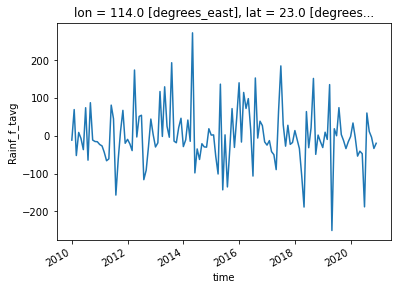

In [26]:
ds_rain = ds.Rainf_f_tavg*60*60*24*30
ds_rain_group = ds_rain.groupby('time.month')
anomalies = ds_rain_group - ds_rain_group.mean(dim = 'time')
anomalies.sel(lon=114.1, lat=22.5, method='nearest').plot()

3.2 [5 points] Make at least 5 different plots using the dataset.

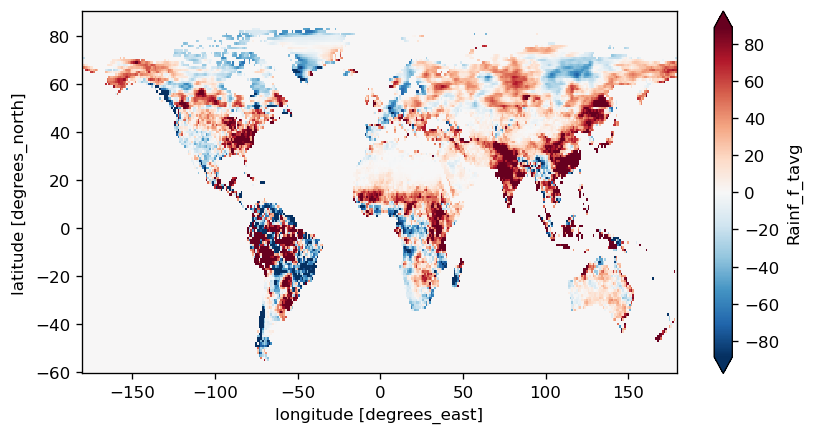

In [60]:
precip_mean = ds_rain.groupby('time.year').sum().mean('year')
plt.figure(figsize=(8,4), dpi=120)
precip_mean.plot(robust=True)

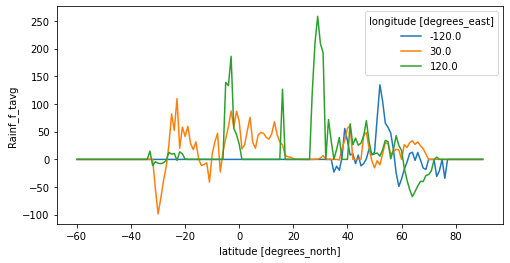

In [61]:
precip_mean.sel(lon = [-120,30,120],method="nearest").plot(x = 'lat',hue ='lon',figsize=(8,4))

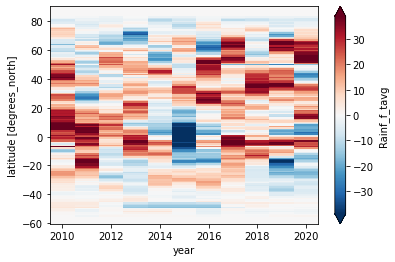

In [62]:
ds_rain.groupby('time.year').sum().mean(dim='lon').transpose().plot(robust = True)

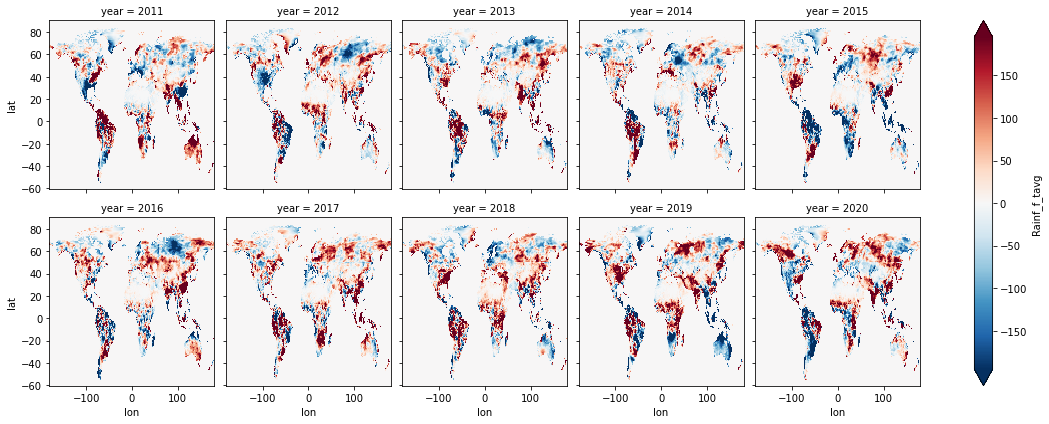

In [63]:
ds_rain.groupby('time.year').sum().sel(year = slice("2011","2020")).plot(col = 'year',col_wrap=5, robust=True)

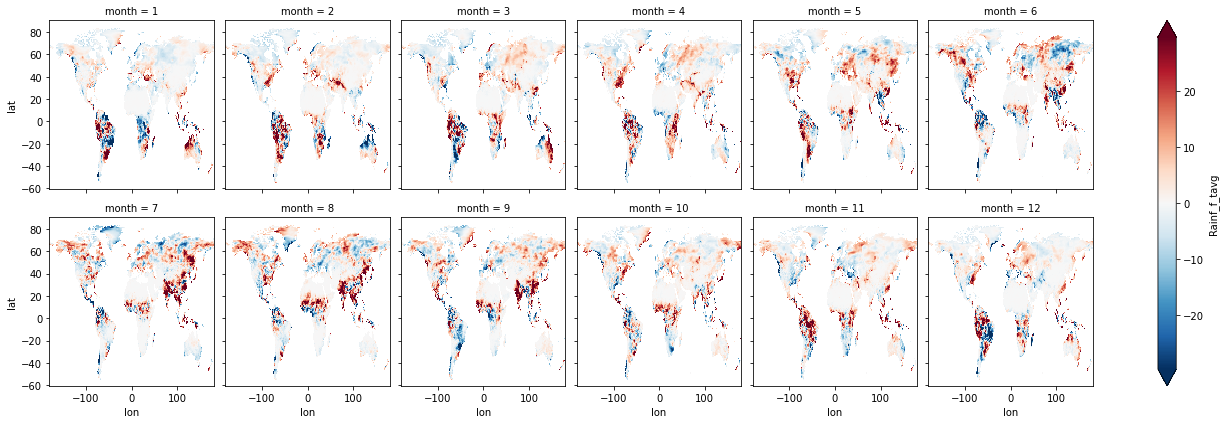

In [64]:
ds_rain.groupby('time.month').mean().plot(col = 'month',col_wrap=6, robust=True)